# Exercise 2.1

First of all, we import usefull libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now, we import our normalized stored data.

In [2]:
%store -r data_set

We define some variables like the assignation matrix, number of clusters, the error margin and feature space.

In [3]:
groups = 3
error_margin = 0.0001
m = 2
assignation = np.zeros((len(data_set), groups))

Now, we definde a function to randomly select the centers.

In order to calculate euclidean distance between centroids and points we're calculating norm of a vector defined as their difference, so we can use a built in fuction from numpy, $linalg.norm(a - b)$.

We're also defining a function which calculates value of $\mu$, so it's different of zero for that group where distance between group and the point is minimal.

Finally, we define a funtion to calcuate new centroids, based in all previous defined functions.

In order to stop the loop, we define function $calculate\_differences$, so we can study if we're achieving better centroids.

Finally, we sum up eveything by defining function $cluster\_hcm$, so it's done.

In [4]:
def select_centers():
    return np.random.rand(groups, len(data_set[0]))


def calculate_distance(x, v):
    return np.linalg.norm(x - v)


def calculate_u(x, centers):
    distances = np.zeros(groups); mu = np.zeros(groups)
    
    for i in range(groups):
        distances[i] = calculate_distance(x, centers[i])  
    
    aux = np.argmin(distances); mu[aux] = 1
    return mu


def calculate_new_centers(u):
    new_centers = []
    
    for c in range(groups):
        u_x_vector = np.zeros(2)
        u_scalar = 0.0
    
        for i in range(len(data_set)):
            u_scalar += pow(u[i][c], m)
            u_x_vector = np.add(u_x_vector, np.multiply(pow(u[i][c], m), data_set[i]))
        
        new_centers.append(np.divide(u_x_vector, u_scalar))
    return new_centers


def calculate_differences(new_assignation, assignation):     
    return np.sum(np.abs(np.subtract(assignation, new_assignation)))


def cluster_hcm(assignation, centers):
    difference_limit_not_achieved = True
    new_centers = centers
    iteraction = 0
    
    while difference_limit_not_achieved:
        new_assignation = []
        
        for i in range(len(data_set)):
            new_assignation.append(calculate_u(data_set[i], new_centers))
        
        new_centers = calculate_new_centers(new_assignation)
        
        if iteraction > 0:
            if calculate_differences(new_assignation, assignation) < error_margin:
                difference_limit_not_achieved = False
        
        assignation = new_assignation
        
        iteraction += 1
    return new_assignation, new_centers

Then, we can define centers and build new clusters (we're storing data in order to use it later).

In [5]:
centers = select_centers()

new_assignation_hcm, new_centers_hcm = cluster_hcm(assignation, centers)
%store new_assignation_hcm
%store new_centers_hcm

pd.DataFrame(new_assignation_hcm, columns = ['Cluster 1', 'Cluster 2', 'Cluster 3'])

Stored 'new_assignation_hcm' (list)
Stored 'new_centers_hcm' (list)


,Cluster 1,Cluster 2,Cluster 3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,0.0,1.0,0.0


Once we have our final centers, we add some colors and plot them.

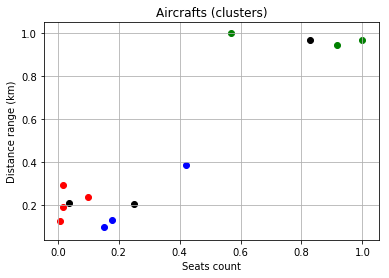

In [6]:
red = data_set[np.where(np.array(new_assignation_hcm)[:,0] == 1)]
blue = data_set[np.where(np.array(new_assignation_hcm)[:,1] == 1)]
green = data_set[np.where(np.array(new_assignation_hcm)[:,2] == 1)]

fig, ax = plt.subplots()

ax.scatter(blue[:, 0], blue[:, 1], c = 'blue')
ax.scatter(red[:,0], red[:,1], c = 'red')
ax.scatter(green[:,0], green[:,1], c = 'green')

ax.scatter(np.array(new_centers_hcm)[:,0], np.array(new_centers_hcm)[:,1], c = 'black')
ax.set(xlabel = u'Seats count', ylabel = u'Distance range (km)', title = u'Aircrafts (clusters)')

ax.grid()
plt.show()

Since we have some $error\_margin$, we can obtain different groups in different iterations.